In [166]:
import numpy as np
from sktime.datasets import load_airline # pip install sktime
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
y = pd.read_csv("xauusd_m.csv")

In [168]:
y["Date"] = pd.to_datetime(y["Date"],format="%Y/%m/%d")
y=y.set_index("Date")
y = y["Close"]
print(y)

Date
2006-12-01     635.700
2007-01-01     652.100
2007-02-01     669.300
2007-03-01     663.400
2007-04-01     680.600
                ...   
2022-07-01    1761.035
2022-08-01    1711.145
2022-09-01    1661.815
2022-10-01    1632.755
2022-11-01    1778.815
Name: Close, Length: 192, dtype: float64


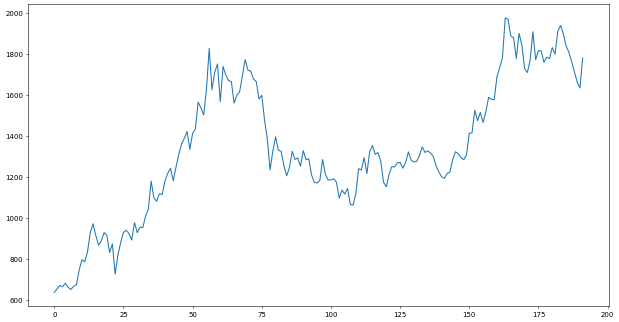

In [169]:
fig = plt.figure(figsize=(15, 8), dpi=50)
ax1 = plt.axes()
ax1.plot(y.values)

In [170]:
y_train, y_test = temporal_train_test_split(y)

In [171]:
regressor = RandomForestRegressor()
forecaster = make_reduction(
    regressor,
    strategy="recursive",
    window_length=12,
    scitype="infer",
)
forecaster.fit(y_train)

RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(),
                                     window_length=12)

In [172]:
fh = np.arange(1, len(y_test) + 1)
print(y_train)
print(fh)  # forecasting horizon
y_pred = forecaster.predict(fh)

Date
2006-12-01     635.70
2007-01-01     652.10
2007-02-01     669.30
2007-03-01     663.40
2007-04-01     680.60
               ...   
2018-07-01    1222.92
2018-08-01    1199.52
2018-09-01    1191.96
2018-10-01    1215.37
2018-11-01    1222.13
Name: Close, Length: 144, dtype: float64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


TypeError: unsupported operand type(s) for *=: 'int' and 'NoneType'

In [ ]:
mape = MeanAbsolutePercentageError()
print(f"mape = {mape(y_test, y_pred)}")

ValueError: y_pred and y_true do not have the same number of rows.

In [ ]:
# pip install poetry

SyntaxError: invalid syntax (3949450194.py, line 1)

mape = 0.04356744949188808


C:\Users\cre\AppData\Local\Programs\Python\Python38\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


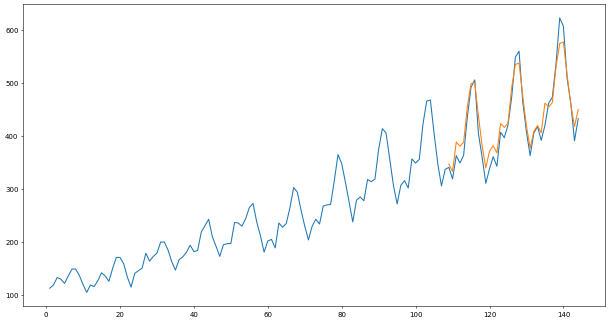

In [ ]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(
    order=(1, 1, 0),
    seasonal_order=(0, 1, 0, 12),
    suppress_warnings=True)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

mape = MeanAbsolutePercentageError()
print(f"mape = {mape(y_test, y_pred)}")

fig = plt.figure(figsize=(15, 8), dpi=50)
ax1 = plt.axes()
ax1.plot(np.arange(1, len(y) + 1), y.values)
ax1.plot(np.arange(len(y_train)+1, len(y) + 1), y_pred.values)